In [1]:
import pandas as pd
import numpy as np

In [2]:
df1 = pd.read_csv("Data-Collisions-2.csv")

/Users/AZ/opt/anaconda3/envs/myenv/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3145: DtypeWarning: Columns (33) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df1.drop(df1.columns.difference(['SEVERITYCODE','X','Y', 'WEATHER','ROADCOND','LIGHTCOND','PEDCOUNT','PEDCYLCOUNT']), 1, inplace=True)

In [4]:
df = pd.read_csv("zipinfacc.csv")

In [5]:
df1.columns = ['SEVERITYCODE','lon','lat','PEDCOUNT','PEDCYLCOUNT','WEATHER','ROADCOND','LIGHTCOND']

In [6]:
df_merged = df.merge(df1, how='outer', left_index=True, right_index=True)

In [7]:
df_merged.drop(df_merged.columns[[0,1,4,5]], axis=1, inplace=True)

In [8]:
df_merged20000 = df_merged.copy()

In [9]:
df_merged20000

,zipcode,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,WEATHER,ROADCOND,LIGHTCOND
0,98125.0,2,0,0,Overcast,Wet,Daylight
1,98102.0,1,0,0,Raining,Wet,Dark - Street Lights On
2,98101.0,1,0,0,Overcast,Dry,Daylight
3,98104.0,1,0,0,Clear,Dry,Daylight
4,98108.0,2,0,0,Raining,Wet,Daylight
...,...,...,...,...,...,...,...
194668,NaN,2,0,0,Clear,Dry,Daylight
194669,NaN,1,0,0,Raining,Wet,Daylight
194670,NaN,2,0,0,Clear,Dry,Daylight
194671,NaN,2,0,1,Clear,Dry,Dusk


In [10]:
df_merged20000=df_merged20000.apply(pd.to_numeric, errors='ignore')

In [11]:
df_merged20000 = df_merged20000.dropna()

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
df_merged20000['WEATHER_CAT'] = labelencoder.fit_transform(df_merged20000['WEATHER'])
df_merged20000['ROADCOND_CAT'] = labelencoder.fit_transform(df_merged20000['ROADCOND'])
df_merged20000['LIGHTCOND_CAT'] = labelencoder.fit_transform(df_merged20000['LIGHTCOND'])

df_merged20000

,zipcode,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,WEATHER,ROADCOND,LIGHTCOND,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,98125.0,2,0,0,Overcast,Wet,Daylight,4,8,5
1,98102.0,1,0,0,Raining,Wet,Dark - Street Lights On,6,8,2
2,98101.0,1,0,0,Overcast,Dry,Daylight,4,0,5
3,98104.0,1,0,0,Clear,Dry,Daylight,1,0,5
4,98108.0,2,0,0,Raining,Wet,Daylight,6,8,5
...,...,...,...,...,...,...,...,...,...,...
184162,98144.0,1,0,0,Clear,Dry,Daylight,1,0,5
184163,98103.0,1,0,0,Clear,Dry,Dark - Street Lights On,1,0,2
184164,98115.0,2,0,0,Clear,Dry,Daylight,1,0,5
184165,98103.0,1,0,0,Clear,Dry,Other,1,0,7


In [13]:
df_merged20000.columns

Index(['zipcode', 'SEVERITYCODE', 'PEDCOUNT', 'PEDCYLCOUNT', 'WEATHER',
       'ROADCOND', 'LIGHTCOND', 'WEATHER_CAT', 'ROADCOND_CAT',
       'LIGHTCOND_CAT'],
      dtype='object')

In [14]:
df_merged20000.drop(df_merged20000.columns[[4,5,6]], axis=1, inplace=True)

In [15]:
df_merged20000

,zipcode,SEVERITYCODE,PEDCOUNT,PEDCYLCOUNT,WEATHER_CAT,ROADCOND_CAT,LIGHTCOND_CAT
0,98125.0,2,0,0,4,8,5
1,98102.0,1,0,0,6,8,2
2,98101.0,1,0,0,4,0,5
3,98104.0,1,0,0,1,0,5
4,98108.0,2,0,0,6,8,5
...,...,...,...,...,...,...,...
184162,98144.0,1,0,0,1,0,5
184163,98103.0,1,0,0,1,0,2
184164,98115.0,2,0,0,1,0,5
184165,98103.0,1,0,0,1,0,7


In [16]:
df_merged20000.drop(df_merged20000.columns[[2,3,4,5,6]], axis=1, inplace=True)

In [17]:
df_merged20000['freq']=1

In [18]:
cols = df_merged20000.columns.tolist()

In [19]:
df_merged20000

,zipcode,SEVERITYCODE,freq
0,98125.0,2,1
1,98102.0,1,1
2,98101.0,1,1
3,98104.0,1,1
4,98108.0,2,1
...,...,...,...
184162,98144.0,1,1
184163,98103.0,1,1
184164,98115.0,2,1
184165,98103.0,1,1


In [20]:
df_merged20000 = df_merged20000.sort_values("freq", ascending=False)

In [21]:
df_merged20000 = df_merged20000.groupby('zipcode') \
       .agg(count=('freq', 'size'), mean_sevcode=('SEVERITYCODE', 'mean')) \
       .reset_index()

In [22]:
df_merged20000

,zipcode,count,mean_sevcode
0,98101.0,18698,1.303722
1,98102.0,5193,1.300019
2,98103.0,12891,1.300209
3,98104.0,12248,1.300131
4,98105.0,8846,1.298327
5,98106.0,4372,1.298262
6,98107.0,6573,1.301080
7,98108.0,9075,1.302259
8,98109.0,7789,1.305816
9,98112.0,5279,1.297594


In [23]:
df_merged20000 = df_merged20000.sort_values("count", ascending=False)

In [24]:
df_merged20000.set_index('zipcode')

,count,mean_sevcode
zipcode,,
98101.0,18698,1.303722
98103.0,12891,1.300209
98104.0,12248,1.300131
98144.0,9759,1.291936
98125.0,9184,1.302047
98117.0,9105,1.295222
98108.0,9075,1.302259
98105.0,8846,1.298327
98121.0,8388,1.294707


In [25]:
df_meansev = df_merged20000.drop(df_merged20000.columns[[1]], axis=1)

In [26]:
df_zipcount = df_merged20000.drop(df_merged20000.columns[[2]], axis=1)

In [27]:
df_meansev = df_meansev.sort_values("zipcode", ascending=True)

In [28]:
df_meansev.set_index('zipcode', inplace=True)

df_meansev.head()

,mean_sevcode
zipcode,
98101.0,1.303722
98102.0,1.300019
98103.0,1.300209
98104.0,1.300131
98105.0,1.298327


In [29]:
df_meansev.describe()

,mean_sevcode
count,28.000000
mean,1.298944
std,0.009210
min,1.280182
25%,1.294225
50%,1.299811
75%,1.304102
max,1.328603


In [45]:
df_meansev = df_meansev.transpose()

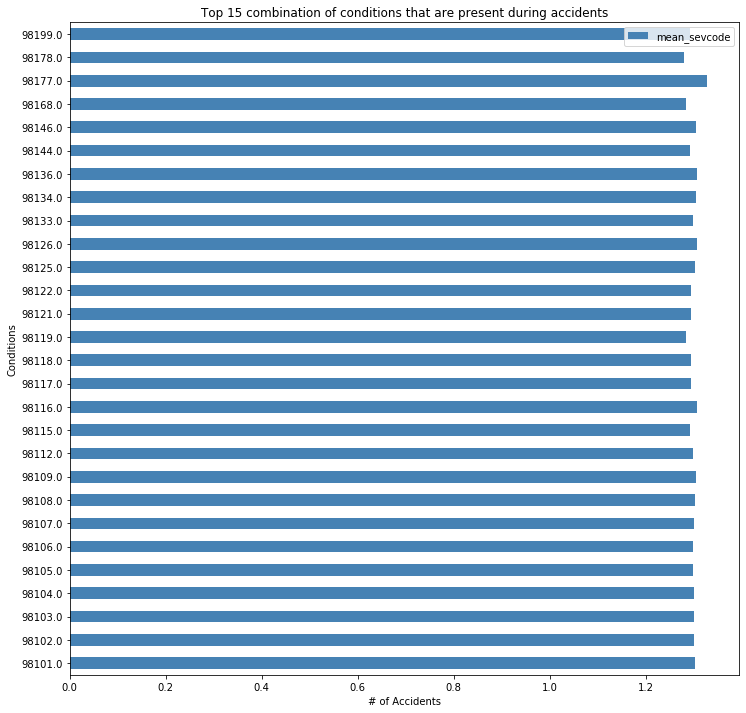

In [58]:
df_meansev.plot(kind='barh', figsize=(12, 12), color='steelblue')

plt.xlabel('# of Accidents') # add to x-label to the plot
plt.ylabel('Conditions') # add y-label to the plot
plt.title('Top 15 combination of conditions that are present during accidents') # add title to the plot1
   

plt.show()

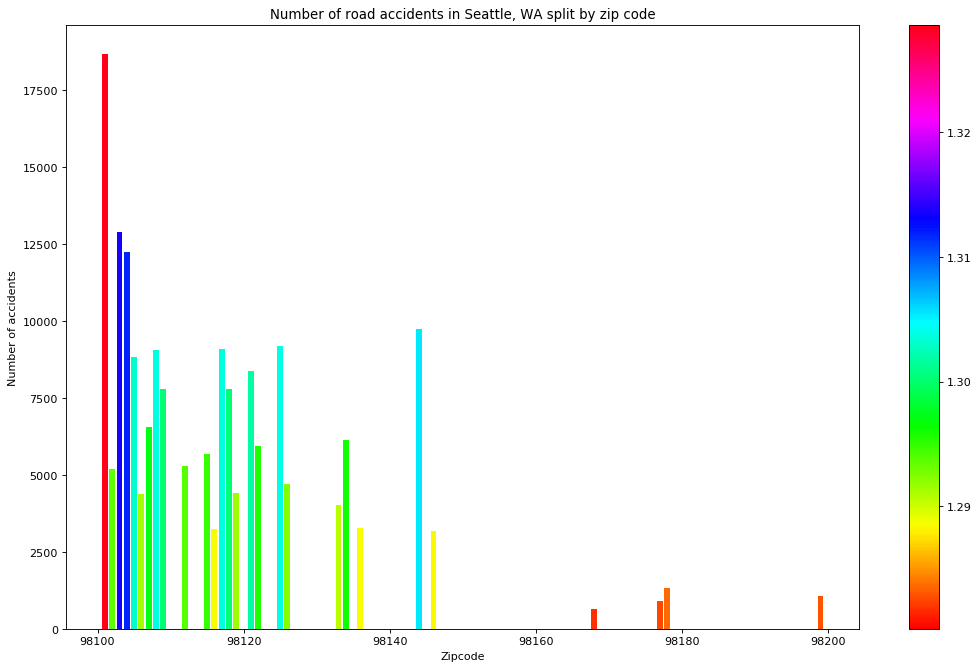

In [34]:
%matplotlib inline 
import matplotlib.pyplot as plt
from matplotlib import cm
import numpy as np
from matplotlib.pyplot import figure
figure(num=None, figsize=(16, 10), dpi=80, facecolor='w', edgecolor='k')

colors = cm.hsv(df_merged20000['count'] / float(max(df_merged20000['count'])))
plot = plt.scatter(df_merged20000['count'], df_merged20000['zipcode'], c = df_merged20000['mean_sevcode'], cmap = 'hsv')
plt.clf()
plt.colorbar(plot)
plt.bar((df_merged20000['zipcode']), df_merged20000['count'], color = colors)
plt.xlabel('Zipcode')
plt.ylabel('Number of accidents')
plt.title('Number of road accidents in Seattle, WA split by zip code')
plt.show()

In [30]:
df_zipcount = df_zipcount.append(dict(zip(df_zipcount.columns,['98195', '0'])), ignore_index=True)
df_zipcount = df_zipcount.append(dict(zip(df_zipcount.columns,['98154', '0'])), ignore_index=True)
df_zipcount = df_zipcount.append(dict(zip(df_zipcount.columns,['98164', '0'])), ignore_index=True)
df_zipcount = df_zipcount.append(dict(zip(df_zipcount.columns,['98155', '0'])), ignore_index=True)

In [67]:
# convert float to int then to string
df_zipcount['zipcode'] = df_zipcount['zipcode'].astype('int').astype('str')
# choropleth map
vis = 'zip-codes.geojson'
m = folium.Map(location = [47.5979, -122.3088], zoom_start =11, tiles = "cartodbpositron")
m.choropleth(geo_data=vis, data = df_zipcount, columns = ['zipcode', 'count'], fill_color = 'YlOrRd', key_on = 'feature.properties.GEOID10')
folium.LayerControl().add_to(m)

m